In [1]:
using Revise
using SSMC, SSMC.BasicMiCRM

Precompiling packages...
  11013.1 ms  ✓ SSMC
  1 dependency successfully precompiled in 13 seconds. 573 already precompiled.


In [2]:
using CairoMakie, ProgressLogging

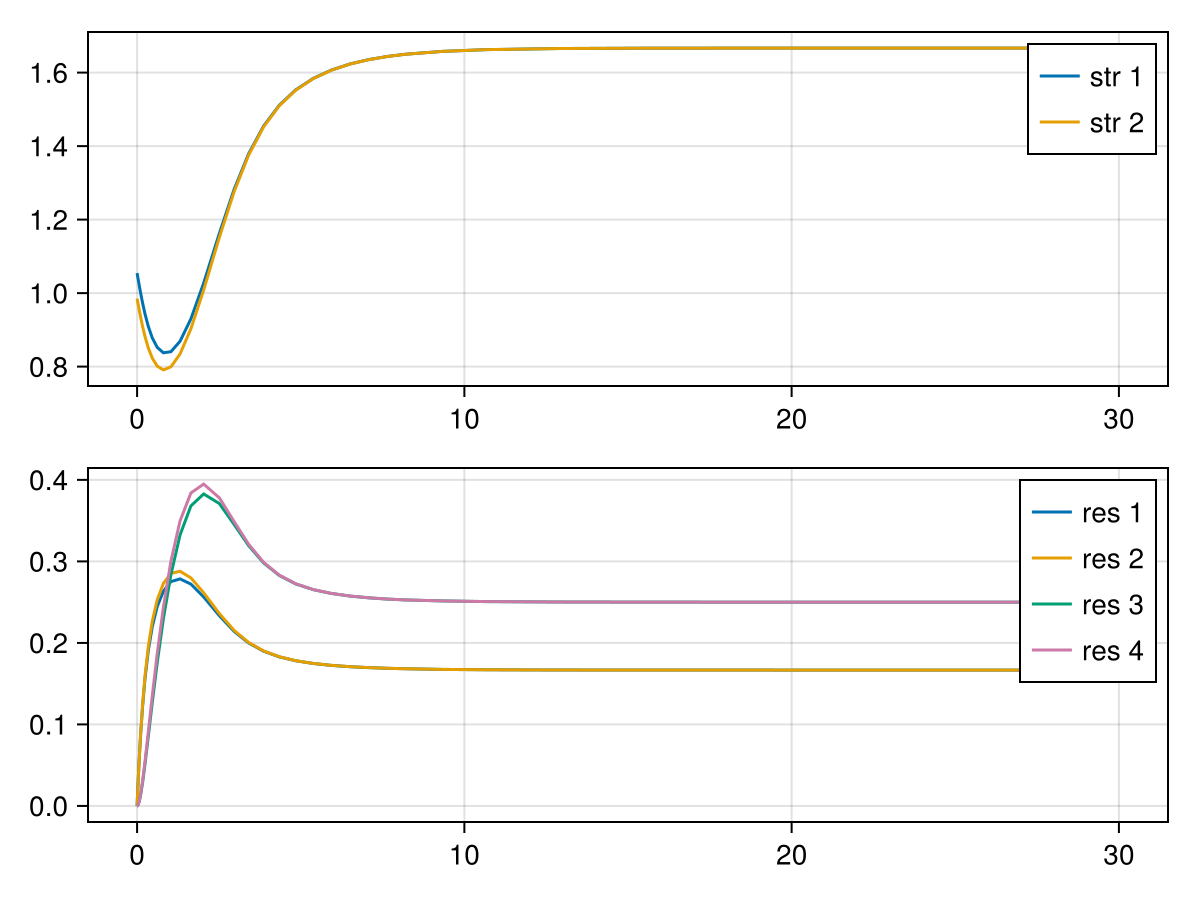

2×4 SMatrix{2, 4, Float64, 8} with indices SOneTo(2)×SOneTo(4):
 3.0  0.0  2.0  0.0
 0.0  3.0  0.0  2.0

4×4 SMatrix{4, 4, Float64, 16} with indices SOneTo(4)×SOneTo(4):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

In [36]:
p, s = make_solve_plot_return(2,4,30;
    D=[0. 0. 0. 0.; 0. 0. 0. 0.; 0. 1. 0. 0.; 1. 0. 0. 0.],
    K=[1., 1., 0., 0.],
    r=[1., 1., 0., 0.],
    l=[1., 1., 0., 0.],
    c=[3.0 0. 2. 0.; 0. 3. 0. 2.],
    m=[0.5, 0.5],
    u0=[1.,1.,0.,0.,0.,0.],
    u0rand=0.1
)
display(p.p.c)
display(p.p.D)

In [37]:
sssol = solve(SteadyStateProblem(p), DynamicSS())

retcode: Success
u: 6-element Vector{Float64}:
 1.6666640942597684
 1.6666640923646905
 0.1666669027230994
 0.1666669029006591
 0.25000042357891233
 0.2500004239562062

maximum(real(lambdas)) = -7.932106666931268e-5


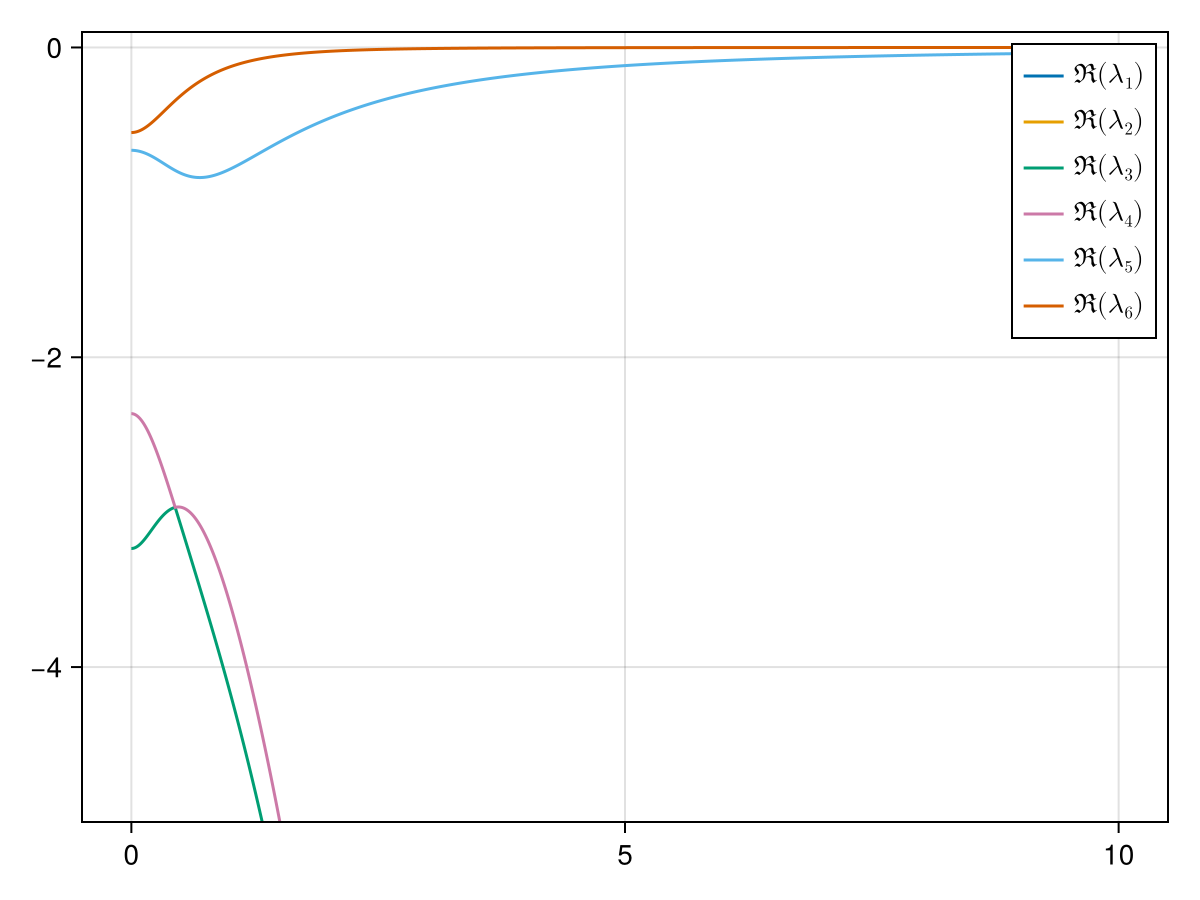

In [57]:
ks = LinRange(0., 10., 10000)
lambdas = do_linstab_for_ks(ks, p, [0., 0., 10., 10., 1., 1.], sssol.u);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-5.0, 0.1))
faa